In [65]:
!pip install wittgenstein

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier,export_text
from sklearn.tree import _tree
import numpy as np
import wittgenstein as lw
from sklearn.metrics import accuracy_score
from itertools import product


In [67]:
df = pd.read_csv('/content/drive/MyDrive/Data/cybersecurity_intrusion_data.csv')
df

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9532,SID_09533,194,ICMP,3,226.049889,AES,0.517737,3,Chrome,0,1
9533,SID_09534,380,TCP,3,182.848475,NaN,0.408485,0,Chrome,0,0
9534,SID_09535,664,TCP,5,35.170248,AES,0.359200,1,Firefox,0,0
9535,SID_09536,406,TCP,4,86.664703,AES,0.537417,1,Chrome,1,0


In [68]:
display(df.head())
display(df.info())
display(df.isnull().sum())
display(df.shape)
display(df.describe().T)

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


None

,0
session_id,0
network_packet_size,0
protocol_type,0
login_attempts,0
session_duration,0
encryption_used,1966
ip_reputation_score,0
failed_logins,0
browser_type,0
unusual_time_access,0


(9537, 11)

,count,mean,std,min,25%,50%,75%,max
network_packet_size,9537.0,500.430639,198.379364,64.000000,365.000000,499.000000,635.000000,1285.000000
login_attempts,9537.0,4.032086,1.963012,1.000000,3.000000,4.000000,5.000000,13.000000
session_duration,9537.0,792.745312,786.560144,0.500000,231.953006,556.277457,1105.380602,7190.392213
ip_reputation_score,9537.0,0.331338,0.177175,0.002497,0.191946,0.314778,0.453388,0.924299
failed_logins,9537.0,1.517773,1.033988,0.000000,1.000000,1.000000,2.000000,5.000000
unusual_time_access,9537.0,0.149942,0.357034,0.000000,0.000000,0.000000,0.000000,1.000000
attack_detected,9537.0,0.447101,0.497220,0.000000,0.000000,0.000000,1.000000,1.000000


In [69]:
attack_counts = df.attack_detected.value_counts()
attack_counts

,count
attack_detected,
0,5273
1,4264


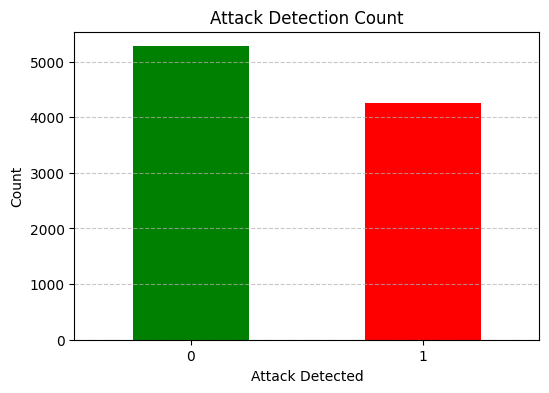

In [70]:


plt.figure(figsize=(6,4))
attack_counts.plot(kind='bar', color=['green', 'red'])
plt.xlabel("Attack Detected")
plt.ylabel("Count")
plt.title("Attack Detection Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

# IREP

In [71]:



features = ['login_attempts', 'ip_reputation_score', 'failed_logins', 'protocol_type', 'encryption_used', 'browser_type']
y = df['attack_detected']
X = df[features]

numerical_features = ['login_attempts', 'ip_reputation_score', 'failed_logins']
categorical_features = ['protocol_type', 'encryption_used', 'browser_type']

# Split into train, prune, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_prune, X_test, y_prune, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])
# First grow a deep tree
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42, max_depth=15))  # Grow deep initially
])

pipeline.fit(X_train, y_train)

def irep_prune(pipeline, X_prune, y_prune):
    # Access the DecisionTreeClassifier from the pipeline
    clf = pipeline.named_steps['model']
    tree = clf.tree_

    # Get transformed features for pruning set
    preprocessor = pipeline.named_steps['preprocessing']
    X_prune_transformed = preprocessor.transform(X_prune)

    def prune_node(node_id):
        if tree.children_left[node_id] == _tree.TREE_LEAF:
            return

        # Recursively prune children first (post-order traversal)
        prune_node(tree.children_left[node_id])
        prune_node(tree.children_right[node_id])

        # Calculate error before pruning
        node_mask = clf.decision_path(X_prune_transformed).toarray()[:, node_id].astype(bool)
        if np.sum(node_mask) == 0:
            return

        original_error = np.sum(y_prune[node_mask] != clf.predict(X_prune_transformed[node_mask]))

        # Calculate error if we prune to majority class
        majority_class = np.argmax(np.bincount(y_prune[node_mask]))
        pruned_error = np.sum(y_prune[node_mask] != majority_class)

        if pruned_error <= original_error:
            # Convert to leaf node
            tree.children_left[node_id] = _tree.TREE_LEAF
            tree.children_right[node_id] = _tree.TREE_LEAF
            tree.value[node_id] = np.array([[np.sum(y_prune[node_mask] == c) for c in clf.classes_]])

    prune_node(0)

# Apply custom pruning
irep_prune(pipeline, X_prune, y_prune)

# Evaluate
y_pred = pipeline.predict(X_test)
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8881900768693222


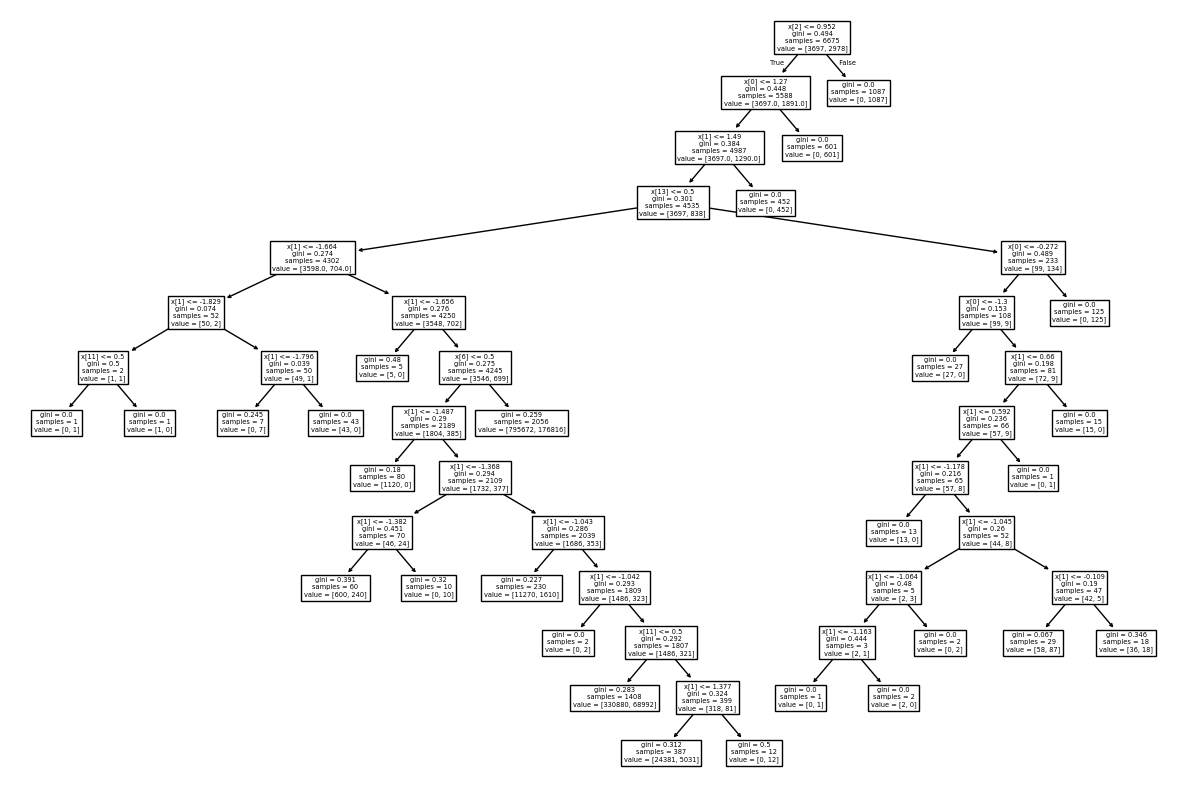

In [72]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(pipeline['model'])
plt.show()

# DECISION TREE

In [73]:



features = ['login_attempts', 'ip_reputation_score', 'failed_logins', 'protocol_type', 'encryption_used', 'browser_type']
y = df['attack_detected']
X = df[features]

numerical_features = ['login_attempts', 'ip_reputation_score', 'failed_logins']
categorical_features = ['protocol_type', 'encryption_used', 'browser_type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42,max_depth= 15))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

tree_rules = export_text(pipeline['model'])

In [74]:
print(type(tree_rules))

<class 'str'>


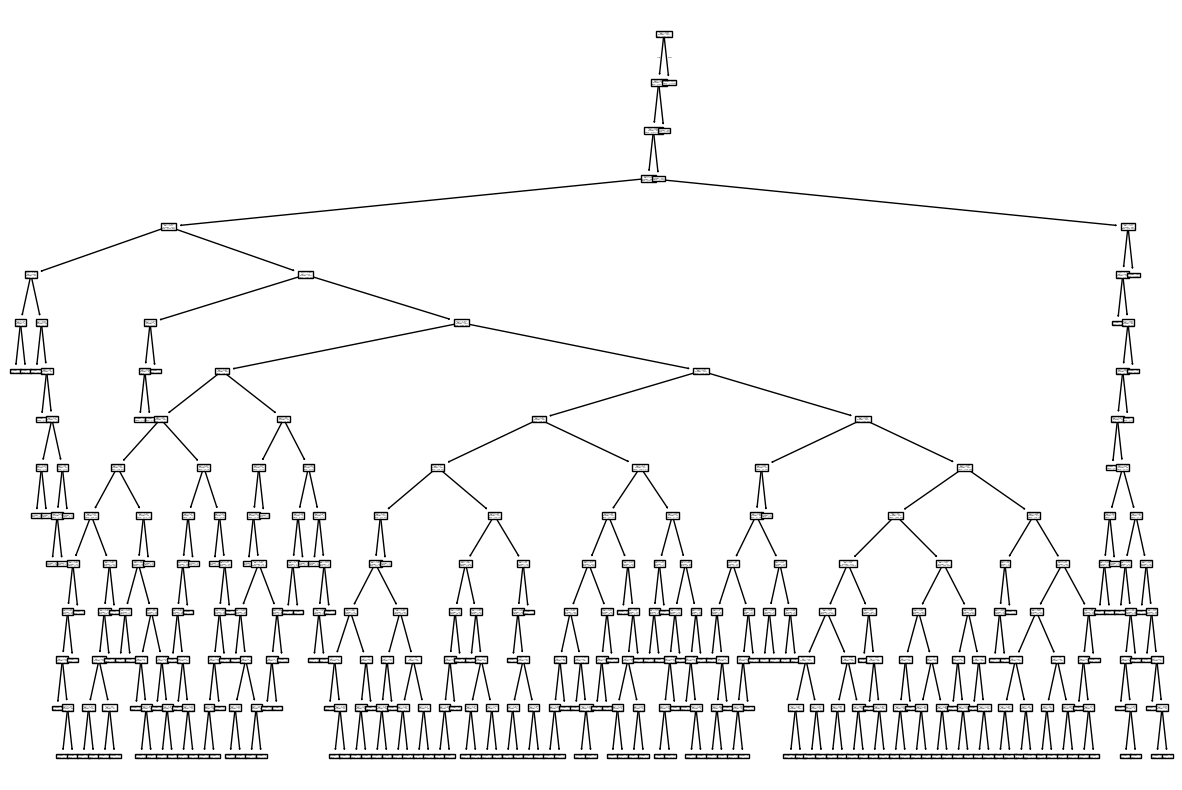

In [75]:
#Visiualize the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(pipeline['model'])
plt.show()

In [76]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8752620545073375


# DT Randomized Tree

In [77]:



features = ['login_attempts', 'ip_reputation_score', 'failed_logins', 'protocol_type', 'encryption_used', 'browser_type']
y = df['attack_detected']
X = df[features]

numerical_features = ['login_attempts', 'ip_reputation_score', 'failed_logins']
categorical_features = ['protocol_type', 'encryption_used', 'browser_type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', DecisionTreeClassifier(
        random_state=42,
        max_depth=15,
        splitter='random',  # Random feature selection
        min_impurity_decrease=0.005  # Minimum purity improvement
    ))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

tree_rules = export_text(pipeline['model'])

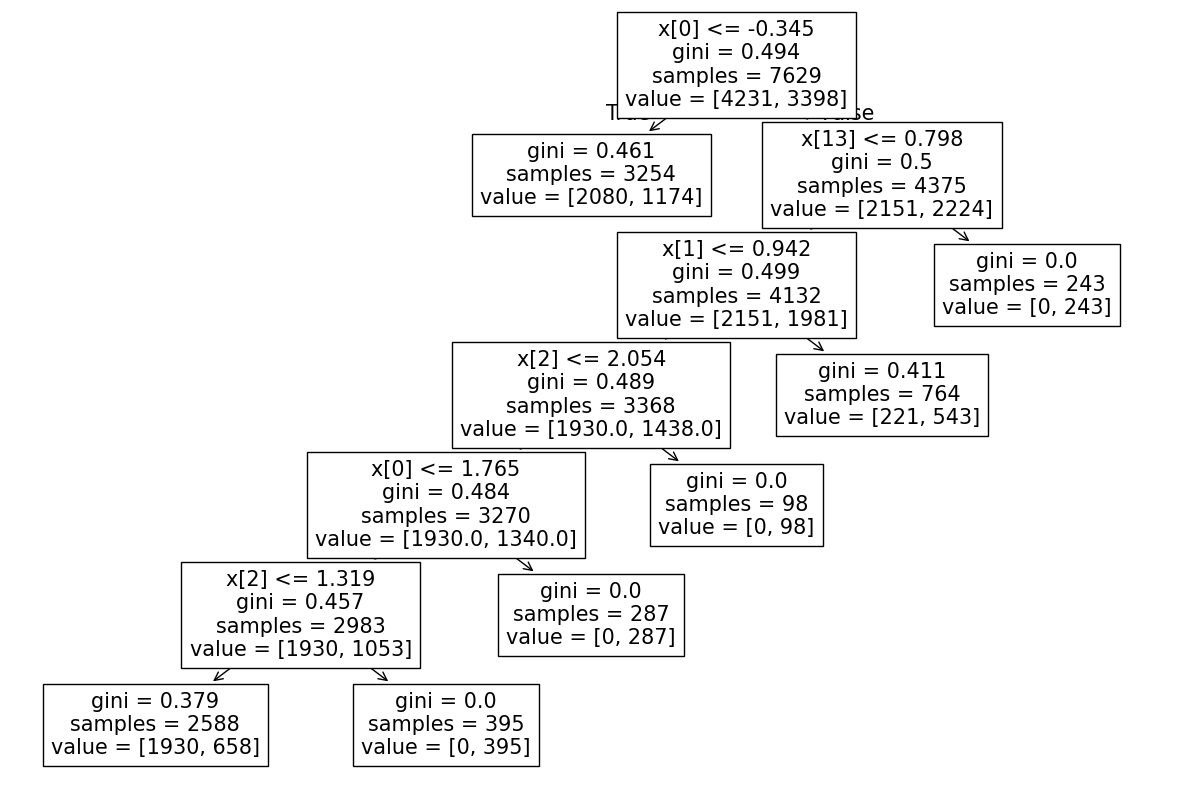

In [78]:
#Visiualize the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(pipeline['model'])
plt.show()

In [79]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7237945492662474


# Balanced Class Weights

In [80]:


features = ['login_attempts', 'ip_reputation_score', 'failed_logins', 'protocol_type', 'encryption_used', 'browser_type']
y = df['attack_detected']
X = df[features]

numerical_features = ['login_attempts', 'ip_reputation_score', 'failed_logins']
categorical_features = ['protocol_type', 'encryption_used', 'browser_type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])


pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', DecisionTreeClassifier(
        random_state=42,
        max_depth=15,
        class_weight='balanced'  # Adjusts for class imbalance
    ))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

tree_rules = export_text(pipeline['model'])

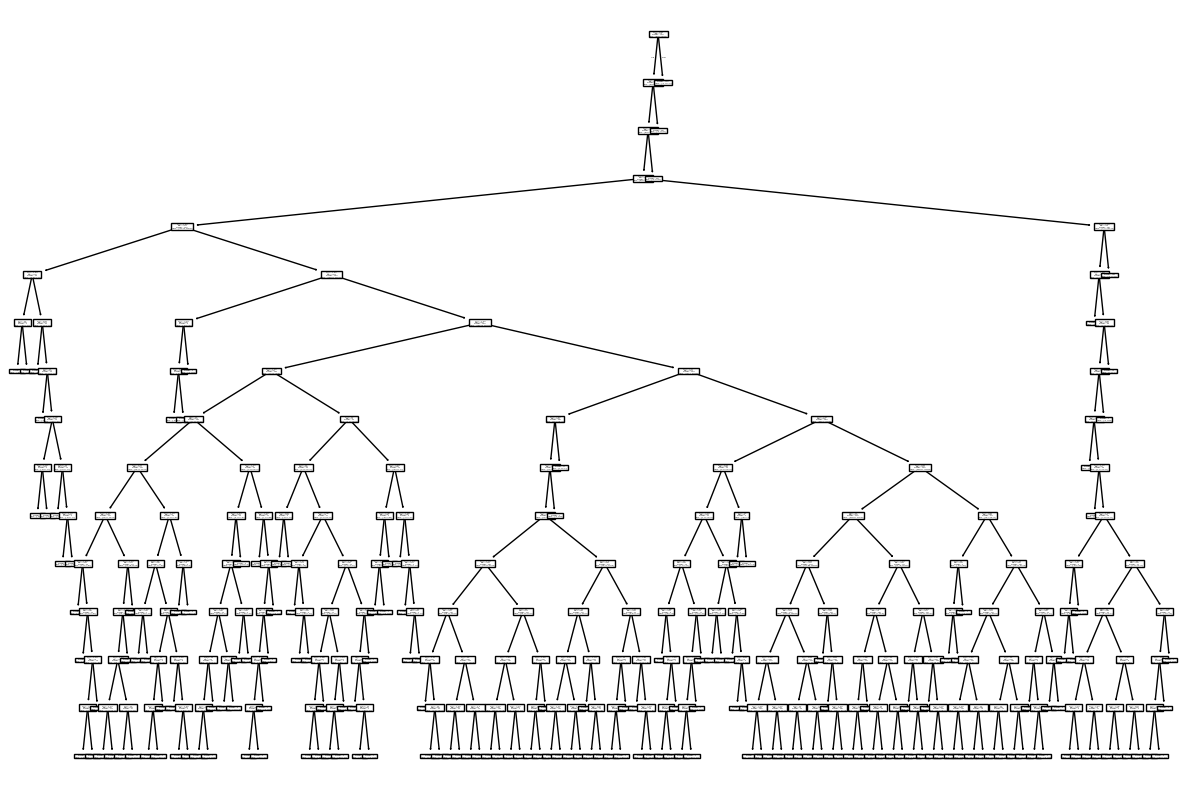

In [81]:
#Visiualize the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(pipeline['model'])
plt.show()

In [82]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8784067085953878


# Ripper Algo


In [83]:


# Define features and target
features = ['login_attempts', 'ip_reputation_score', 'failed_logins', 'protocol_type', 'encryption_used', 'browser_type']
y = df['attack_detected']
X = df[features]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X_train and y_train for wittgenstein
train_data = X_train.copy()
train_data['attack_detected'] = y_train

# Define hyperparameter grid
param_grid = {
    'k': [1, 2, 3],  # Number of optimization iterations
    'prune_size': [0.2, 0.33, 0.5],  # Fraction of training data for pruning
    'max_rules': [10, 20, 30]  # Max number of rules
}

# Grid Search
best_model = None
best_score = 0
best_params = {}

for k, prune_size, max_rules in product(param_grid['k'], param_grid['prune_size'], param_grid['max_rules']):
    ripper = lw.RIPPER(k=k, prune_size=prune_size, max_rules=max_rules)
    ripper.fit(train_data, class_feat='attack_detected')
    y_pred = ripper.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_score:
        best_score = accuracy
        best_model = ripper
        best_params = {'k': k, 'prune_size': prune_size, 'max_rules': max_rules}

# Best Model Results
print(f"Best RIPPER Model Accuracy: {best_score:.4f}")
print(f"Best Parameters: {best_params}")

# Display best rules
print(best_model.ruleset_)



Best RIPPER Model Accuracy: 0.8868
Best Parameters: {'k': 1, 'prune_size': 0.2, 'max_rules': 30}
[[failed_logins=3] V [ip_reputation_score=>0.58^browser_type=Chrome^failed_logins=1^encryption_used=AES] V [ip_reputation_score=>0.58^browser_type=Chrome^encryption_used=DES^failed_logins=2^protocol_type=UDP] V [ip_reputation_score=>0.58^browser_type=Chrome^encryption_used=DES] V [login_attempts=6.0-7.0] V [ip_reputation_score=>0.58^protocol_type=TCP^failed_logins=2^login_attempts=3.0-4.0^browser_type=Chrome] V [ip_reputation_score=>0.58] V [login_attempts=>7.0] V [failed_logins=4] V [browser_type=Unknown^login_attempts=3.0-4.0] V [browser_type=Unknown^login_attempts=4.0-5.0] V [failed_logins=5] V [browser_type=Unknown^login_attempts=5.0-6.0]]
